In [1]:
! pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
data.shape

(45211, 11)

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
data.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [7]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [9]:
data['target'] = data['y'].map({'yes':1,'no':0})

<Axes: xlabel='age', ylabel='target'>

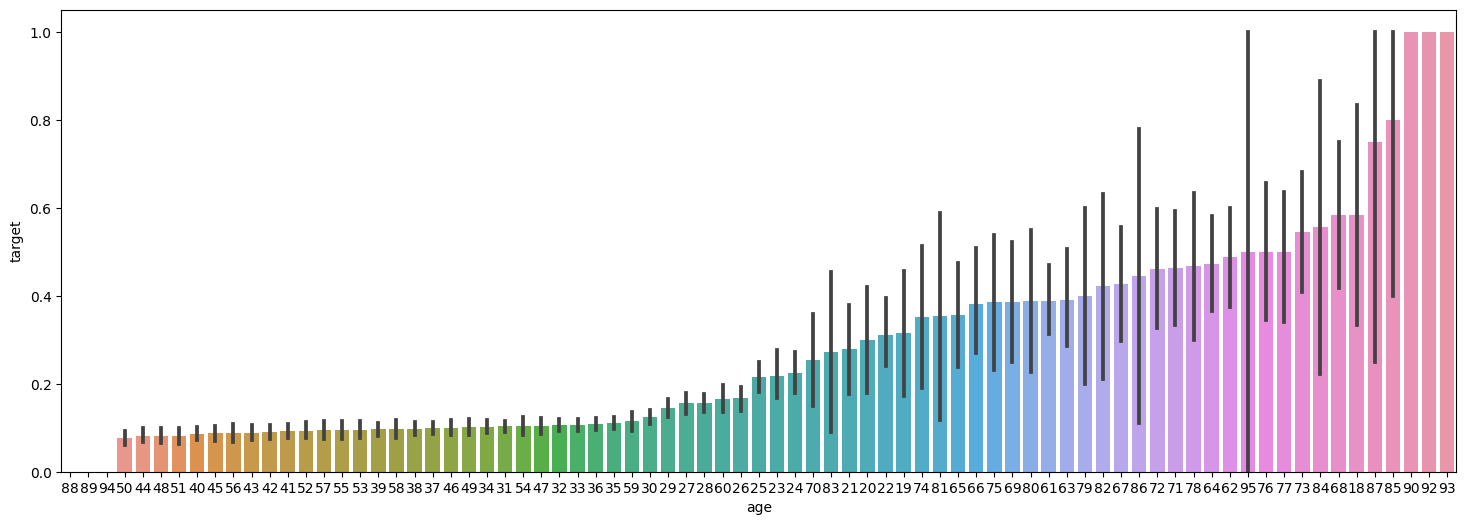

In [10]:
age_conversion_rates = data.groupby('age')['target'].mean()
sorted_age = age_conversion_rates.reset_index().sort_values('target')['age']
plt.figure(figsize = (18,6))
sns.barplot(x= 'age', y = 'target', data = data ,order = sorted_age)

In [11]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
data1 = data

In [14]:
data.job = data1.job.str.replace('unknown','blue-collar')

<Axes: xlabel='job', ylabel='target'>

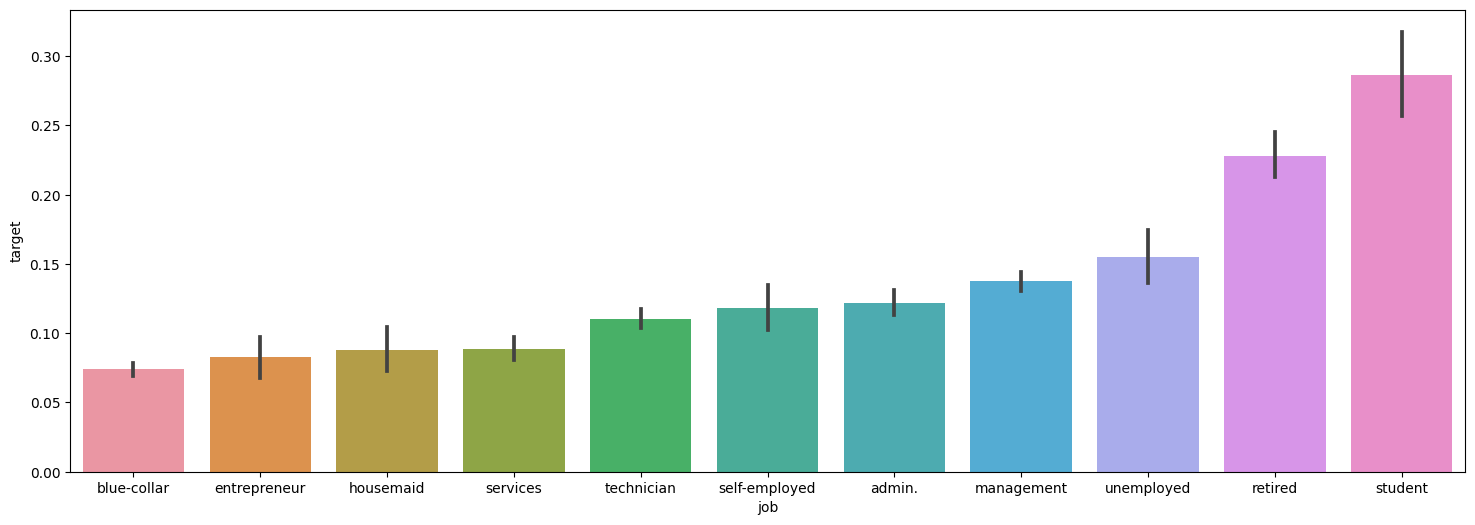

In [15]:
job_conversion_rates = data.groupby('job')['target'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('target')['job']
plt.figure(figsize = (18,6))
sns.barplot(x= 'job', y = 'target', data = data1 ,order = sorted_jobs)

In [16]:
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [17]:
data1['job'] = data1['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7,
                                 'unemployed':8, 'retired':9, 'student':10})

In [18]:
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,4,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,1,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,0,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,0,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,9,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,9,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,0,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [19]:
data1.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

<Axes: xlabel='marital', ylabel='target'>

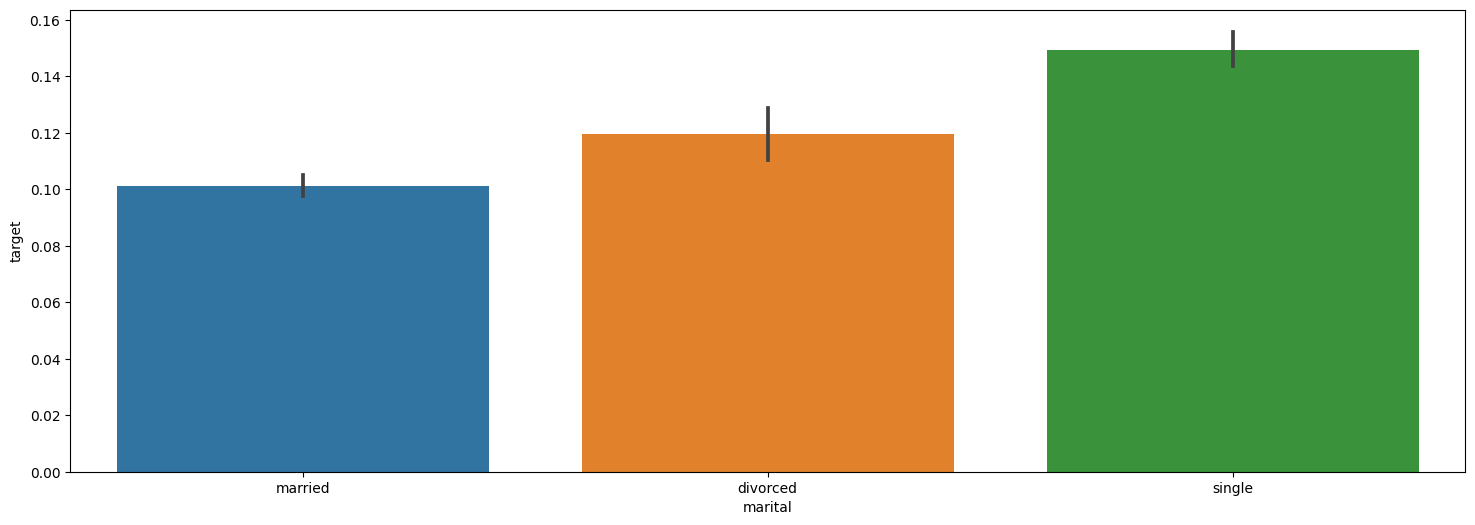

In [20]:
marital_conversion_rates = data.groupby('marital')['target'].mean()
sorted_marital = marital_conversion_rates.reset_index().sort_values('target')['marital']
plt.figure(figsize = (18,6))
sns.barplot(x= 'marital', y = 'target', data = data1 ,order = sorted_marital)

In [21]:
data1['marital'] = data1['marital'].map({'married':0, 'divorced':1,'single':2})
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,4,2,secondary,unknown,5,may,151,1,unknown,no,0
2,33,1,0,secondary,unknown,5,may,76,1,unknown,no,0
3,47,0,0,unknown,unknown,5,may,92,1,unknown,no,0
4,33,0,2,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,9,1,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,9,0,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,0,0,secondary,telephone,17,nov,508,4,unknown,no,0


In [22]:
data1['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [23]:
data1['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [24]:
data.education_qual = data1.education_qual.str.replace('unknown','secondary')

In [25]:
data.education_qual.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

<Axes: xlabel='education_qual', ylabel='target'>

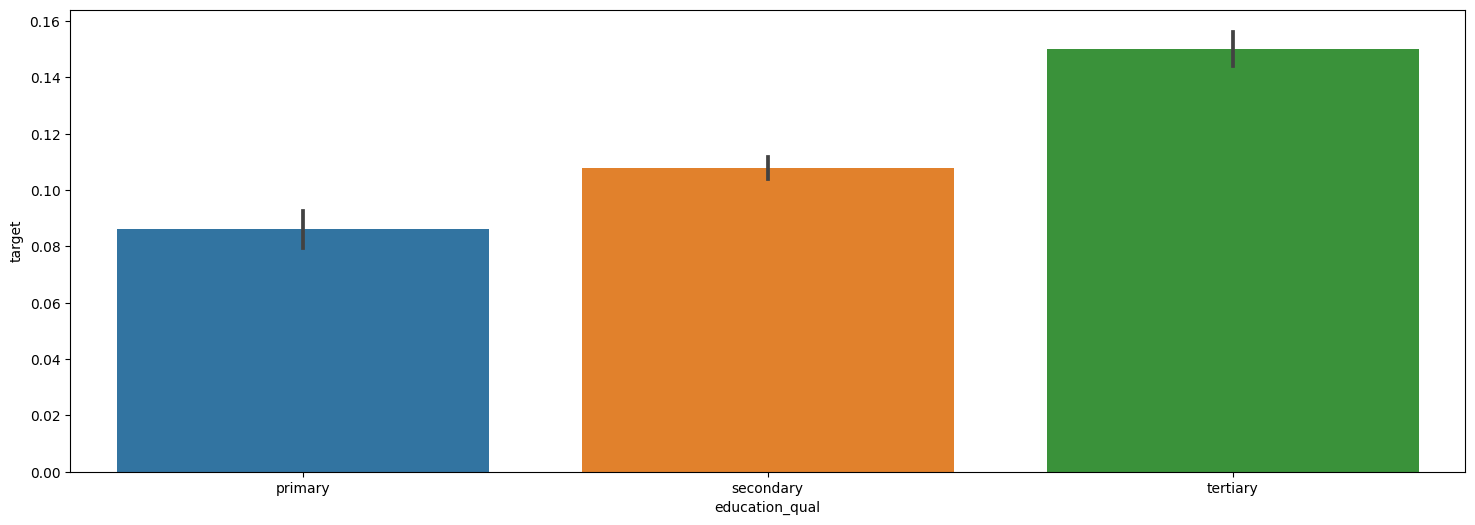

In [26]:
education_qual_conversion_rates = data.groupby('education_qual')['target'].mean()
sorted_education_qual = education_qual_conversion_rates.reset_index().sort_values('target')['education_qual']
plt.figure(figsize = (18,6))
sns.barplot(x= 'education_qual', y = 'target', data = data1 ,order = sorted_education_qual)

In [27]:
data1['education_qual'] = data1['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})
data1.education_qual.unique()

array([2, 1, 0])

In [28]:
data1['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
data1['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

<Axes: xlabel='call_type', ylabel='target'>

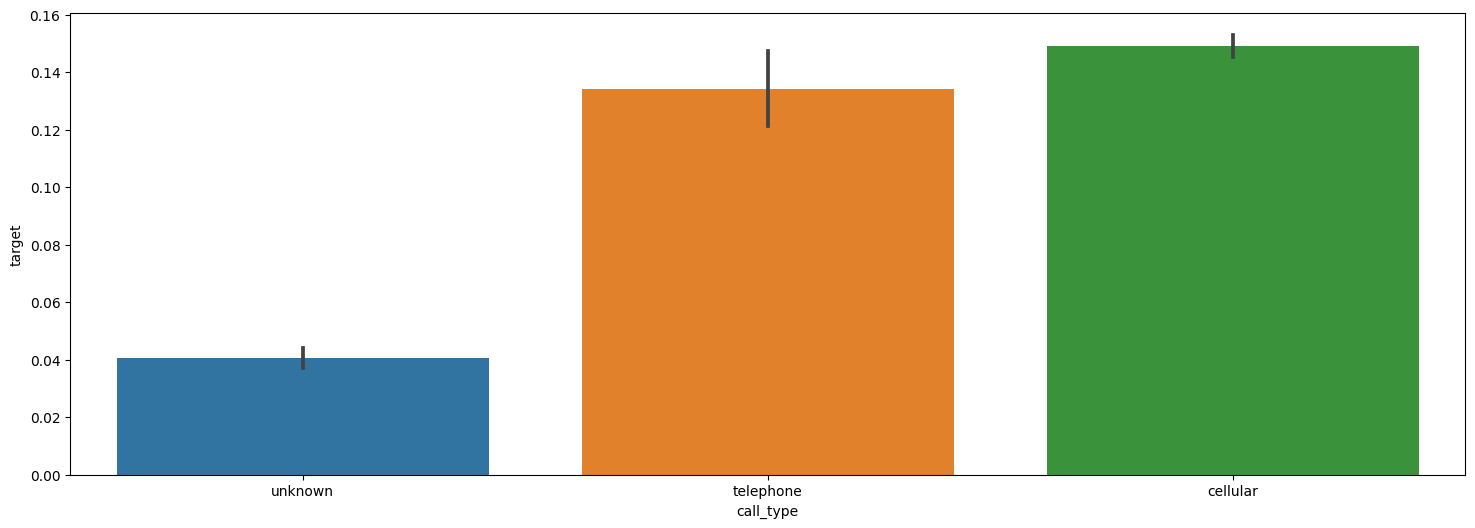

In [30]:
call_type_conversion_rates = data.groupby('call_type')['target'].mean()
sorted_call_type = call_type_conversion_rates.reset_index().sort_values('target')['call_type']
plt.figure(figsize = (18,6))
sns.barplot(x= 'call_type', y = 'target', data = data1 ,order = sorted_call_type)

In [31]:
data1['call_type']= data1['call_type'].map({'unknown':0,'telephone':1,'cellular':2})

In [32]:
data1['day'].dtypes

dtype('int64')

In [33]:
data1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

<Axes: xlabel='day', ylabel='target'>

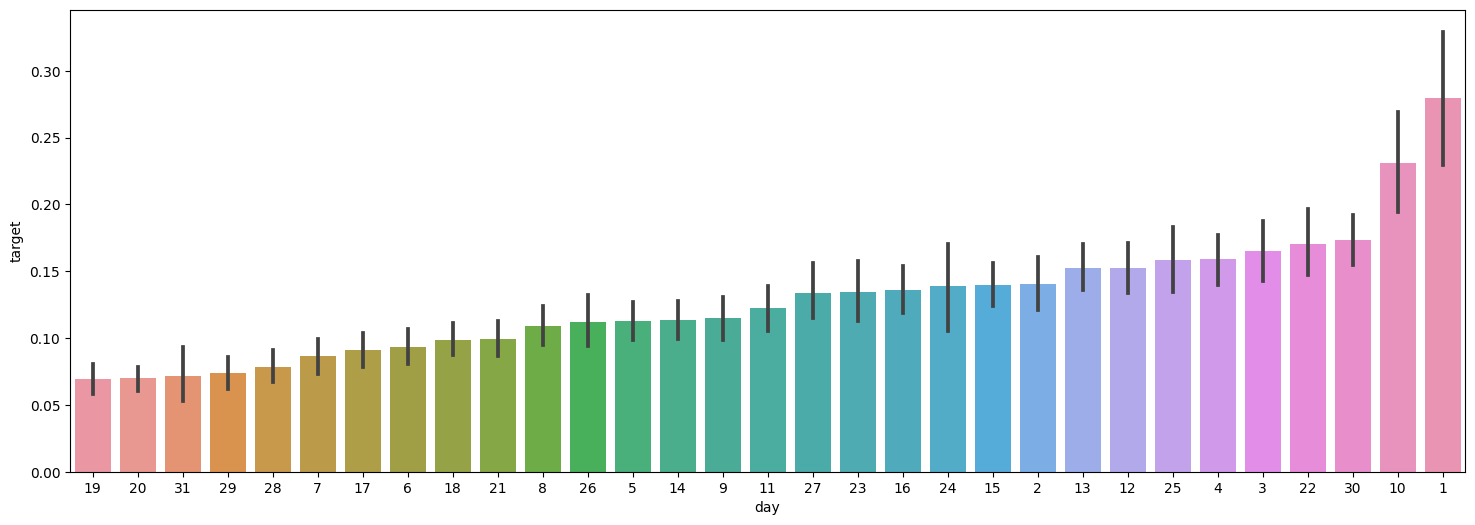

In [34]:
day_conversion_rates = data.groupby('day')['target'].mean()
sorted_day = day_conversion_rates.reset_index().sort_values('target')['day']
plt.figure(figsize = (18,6))
sns.barplot(x= 'day', y = 'target', data = data1 ,order = sorted_day)

In [35]:
data1.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [36]:
data1['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<Axes: xlabel='mon', ylabel='target'>

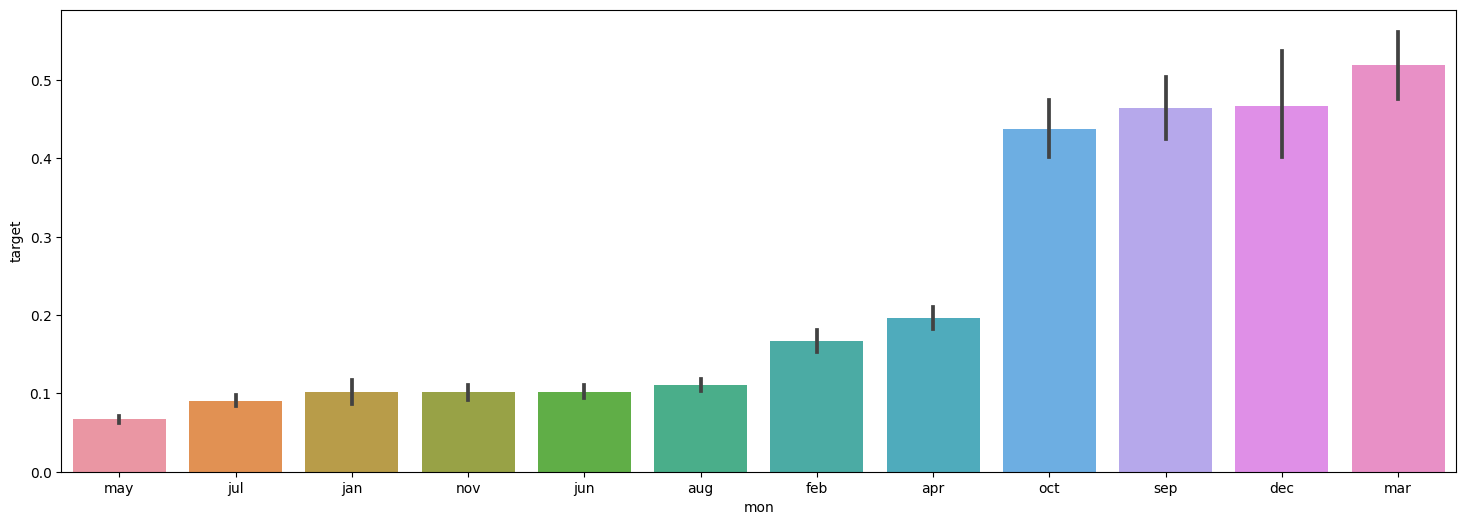

In [37]:
mon_conversion_rates = data.groupby('mon')['target'].mean()
sorted_mon = mon_conversion_rates.reset_index().sort_values('target')['mon']
plt.figure(figsize = (18,6))
sns.barplot(x= 'mon', y = 'target', data = data1 ,order = sorted_mon)

In [38]:
data1['mon']= data1['mon'].map({'may':0, 'jul':1, 'jan':2, 'nov':3, 'jun':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})

In [39]:
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,unknown,no,0
1,44,4,2,1,0,5,0,151,1,unknown,no,0
2,33,1,0,1,0,5,0,76,1,unknown,no,0
3,47,0,0,1,0,5,0,92,1,unknown,no,0
4,33,0,2,1,0,5,0,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,unknown,yes,1
45207,71,9,1,0,2,17,3,456,2,unknown,yes,1
45208,72,9,0,1,2,17,3,1127,5,success,yes,1
45209,57,0,0,1,1,17,3,508,4,unknown,no,0


In [40]:
data1['dur'].dtypes

dtype('int64')

In [41]:
data1['dur'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [42]:
data1['dur'].dropna()

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: dur, Length: 45211, dtype: int64

In [43]:
data1['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [44]:
data1['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

<Axes: xlabel='num_calls', ylabel='target'>

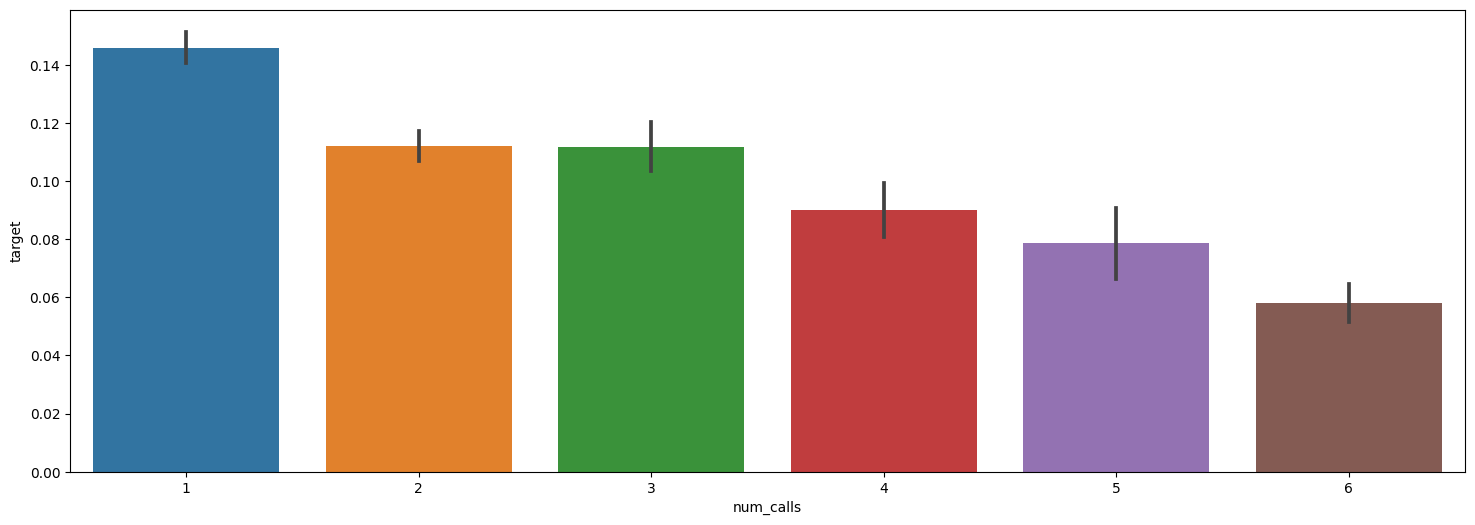

In [45]:
data1['num_calls'] = data1.num_calls.clip(0,6)
num_calls_conversion_rates = data.groupby('num_calls')['target'].mean()
sorted_num_calls = num_calls_conversion_rates.reset_index().sort_values('num_calls')['num_calls']
plt.figure(figsize = (18,6))
sns.barplot(x= 'num_calls', y = 'target', data = data1 ,order = sorted_num_calls)

In [46]:
data1['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [47]:
data1.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

<Axes: xlabel='prev_outcome', ylabel='target'>

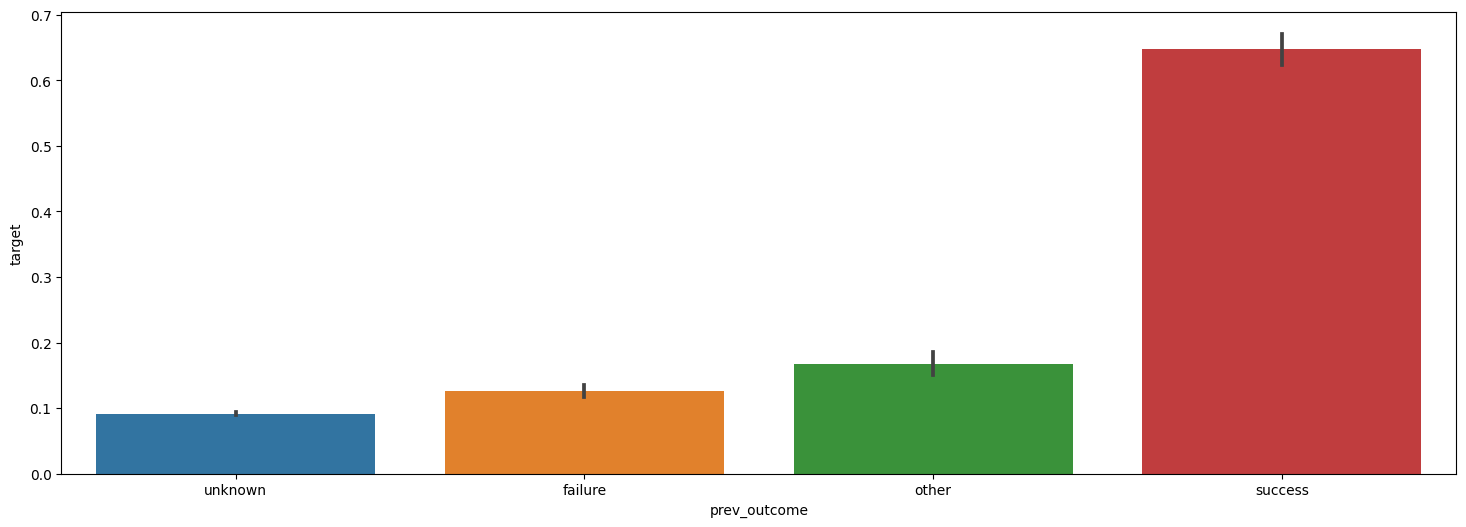

In [48]:
prev_outcome_conversion_rates = data.groupby('prev_outcome')['target'].mean()
sorted_prev_outcome = prev_outcome_conversion_rates.reset_index().sort_values('target')['prev_outcome']
plt.figure(figsize = (18,6))
sns.barplot(x= 'prev_outcome', y = 'target', data = data1 ,order = sorted_prev_outcome)

In [49]:
data1['prev_outcome']= data1['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})

In [50]:
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,0,no,0
1,44,4,2,1,0,5,0,151,1,0,no,0
2,33,1,0,1,0,5,0,76,1,0,no,0
3,47,0,0,1,0,5,0,92,1,0,no,0
4,33,0,2,1,0,5,0,198,1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,0,yes,1
45207,71,9,1,0,2,17,3,456,2,0,yes,1
45208,72,9,0,1,2,17,3,1127,5,3,yes,1
45209,57,0,0,1,1,17,3,508,4,0,no,0


In [51]:
del data1['y']
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,0,1
45207,71,9,1,0,2,17,3,456,2,0,1
45208,72,9,0,1,2,17,3,1127,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


In [52]:
import os
file_path = r'c:\Users\neyaz\OneDrive\Desktop\cleaned_data2.csv'
data1.to_csv(file_path, index= False)

In [53]:
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,0,1
45207,71,9,1,0,2,17,3,456,2,0,1
45208,72,9,0,1,2,17,3,1127,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


In [54]:
data1['target'].value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [55]:
 x = data1.drop('target', axis =1)
 y = data1['target']

In [56]:
# x.shape

In [57]:
#target_count = y.value_counts()
#print('class 0:', target_count[0])
#print('class 1:', target_count[1])
#print('proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2), '%')

#target_count.plot(kind ='bar', title = 'count of target');

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score ,f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

from scipy.stats import zscore

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import xgboost as xgb
from xgboost import XGBClassifier



In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state =0, stratify = y)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36168, 10), (9043, 10), (36168,), (9043,))

In [61]:
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (36168, 10)
Shape of x_test: (9043, 10)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


In [62]:
smt = SMOTEENN(sampling_strategy='all')
x_train,y_train = smt.fit_resample(x_train,y_train)

In [63]:
print(len(x_train))
print(len(y_train))

53887
53887


In [64]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [65]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
Lr.score(x_train,y_train)
y_pred = Lr.predict(x_test)
print('Training Accuracy :', Lr.score(x_train,y_train))
print('Testing Accuracy :', Lr.score(x_test, y_test))
print('F1 Score :', f1_score(y_test,y_pred))
#print('ROC AUC Score :', roc_auc_score(y_test, y_pred))

Training Accuracy : 0.8782452168426522
Testing Accuracy : 0.7322791109145195
F1 Score : 0.43368421052631584


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
print('Precision: {0}'.format(precision_score(y_test, Lr.predict(x_test))))

Precision: 0.2881566677028287


In [67]:
print('Recall:', round(recall_score(y_test, Lr.predict(x_test)),2))

Recall: 0.88


In [68]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train))
  dt = DecisionTreeClassifier(max_depth = depth)
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10)
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train,y_train)
  y_pred = dt.predict(x_test)
  roc = roc_auc_score(y_test,y_pred)

  print('Depth : ', depth, 'Training Accuracy : ', trainAccuracy, 'Cross val score : ', np.mean(valAccuracy))

Depth :  1 Training Accuracy :  0.7902276987028412 Cross val score :  0.7899491395695513
Depth :  2 Training Accuracy :  0.8029209271252806 Cross val score :  0.8028837338508714
Depth :  3 Training Accuracy :  0.8584074080947167 Cross val score :  0.8579805979708176
Depth :  4 Training Accuracy :  0.8664056265889732 Cross val score :  0.8657561258925665
Depth :  5 Training Accuracy :  0.8791545270658971 Cross val score :  0.8720100701434348
Depth :  6 Training Accuracy :  0.8875053352385548 Cross val score :  0.8857796987539439
Depth :  7 Training Accuracy :  0.9036502310390261 Cross val score :  0.8998647055655041
Depth :  8 Training Accuracy :  0.9161393285950229 Cross val score :  0.909867270663122
Depth :  9 Training Accuracy :  0.9276820012247852 Cross val score :  0.9205191209291991
Depth :  10 Training Accuracy :  0.9372019225416148 Cross val score :  0.9254368690490115
Depth :  20 Training Accuracy :  0.9968638075973797 Cross val score :  0.9500068570211557
Depth :  40 Training

In [69]:
t = DecisionTreeClassifier(max_depth = 60)
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
print('Training Accuracy : ', t.score(x_train,y_train))
print('Testing Accuracy :', t.score(x_test, y_test))
print('F1 Score :', f1_score(y_test,y_pred))
#print('ROC AUC Score :', roc_auc_score(y_test, y_pred))

Training Accuracy :  1.0
Testing Accuracy : 0.8214088245051421
F1 Score : 0.5071711931644797


In [70]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

In [71]:
x_test = pd.DataFrame(x_test, columns = ['age', 'job', 'marital', 'education_qual', 'call_type', 'day',
                                         'mon', 'dur', 'num_calls', 'prev_outcome'])
dtc = DecisionTreeClassifier(max_depth = 20)
dtc.fit(x_train,y_train)

importance = dtc.feature_importances_

feature_importances = list(zip(x_test.columns, importance))

feature_importances.sort(key = lambda x: x[1], reverse = True)

for feature, importance in feature_importances:
  print(feature, ' : ', importance)

dur  :  0.5053636921080455
mon  :  0.1488173453370718
call_type  :  0.08660244489339303
day  :  0.08175477735656894
age  :  0.05961321835489897
prev_outcome  :  0.04092257899413007
job  :  0.03470271469654113
num_calls  :  0.025133432300330997
marital  :  0.0103148565838955
education_qual  :  0.006774939375124032


In [72]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)

  #print('K value : ', i, 'Train score : ', knn.score(x_train,y_train) , 'Cross val score : ', np.mean(cross_val_score(knn,x_train,y_train,cv=10)))

In [73]:
knn = KNeighborsClassifier(4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print('Training Accuracy : ', knn.score(x_train,y_train))
print('Testing Accuracy :', knn.score(x_test, y_test))
print('F1 Score :', f1_score(y_test,y_pred))
#print('ROC AUC Score :', roc_auc_score(y_test, y_pred))

Training Accuracy :  0.997012266409338
Testing Accuracy : 0.7714254119208227
F1 Score : 0.4272651704073151


In [74]:
knn.score(x_test,y_test)

0.7714254119208227

In [75]:
x_test.shape

(9043, 10)

In [76]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = i, n_estimators = 100, verbosity =0)
  model.fit(x_train,y_train)
  model.score(x_test,y_test)

  #print('Learning rate: ', i, 'Train score :', model.score(x_train,y_train), 'cross val score :' , np.mean(cross_val_score(model,x_train,y_train,cv=10)))

In [77]:
xg = XGBClassifier(learning_rate = 0.5, n_estimators = 100, verbosity = 0)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
print('Training Accuracy : ', xg.score(x_train,y_train))
print('Testing Accuracy :', xg.score(x_test, y_test))
print('F1 Score :', f1_score(y_test,y_pred))
#print('ROC AUC Score :', roc_auc_score(y_test, y_pred))

Training Accuracy :  0.9880305082858575
Testing Accuracy : 0.8384385712705961
F1 Score : 0.5522525283481459


In [78]:
random = RandomForestClassifier(max_depth = 2, n_estimators=100, max_features = 'sqrt')
random.fit(x_train,y_train)
y_pred =random.predict(x_test)

In [79]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
  random = RandomForestClassifier(max_depth = 2, n_estimators =100, max_features ='sqrt')
  random.fit(x_train,y_train)
  random = RandomForestClassifier(max_depth = 2, n_estimators =100, max_features ='sqrt')
  valAccuracy = cross_val_score(random, x_train, y_train, cv = 10)

  print('Depth :', depth , 'Training accuracy :', trainAccuracy, 'Cross val score: ', np.mean(valAccuracy))

Depth : 1 Training accuracy : 1.0 Cross val score:  0.8529698788383993
Depth : 2 Training accuracy : 1.0 Cross val score:  0.8461218086610757
Depth : 3 Training accuracy : 1.0 Cross val score:  0.857015683188678
Depth : 4 Training accuracy : 1.0 Cross val score:  0.8556056130727953
Depth : 5 Training accuracy : 1.0 Cross val score:  0.8567372419800405
Depth : 6 Training accuracy : 1.0 Cross val score:  0.8544358693221902
Depth : 7 Training accuracy : 1.0 Cross val score:  0.8577950795586655
Depth : 8 Training accuracy : 1.0 Cross val score:  0.8522837909938623
Depth : 9 Training accuracy : 1.0 Cross val score:  0.8542692895134207
Depth : 10 Training accuracy : 1.0 Cross val score:  0.8602817398800907


In [80]:
random = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt')
random.fit(x_train,y_train)
predictions = random.predict(x_test)
print('Training Accuracy : ', random.score(x_train,y_train))
print('Testing Accuracy :', random.score(x_test, y_test))
print('F1 Score :', f1_score(y_test,y_pred))
#print('ROC AUC Score :', roc_auc_score(y_test, y_pred))

Training Accuracy :  0.8961345036836342
Testing Accuracy : 0.7219949131925246
F1 Score : 0.3988391376451078
